In [27]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [28]:
analysis = scripts.Analysis()

In [29]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_1e-20_max_5e-18_ng_5',
                          'wgt_1_.9_.8_.7_.6',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [30]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_1e-20_max_5e-18_ng_5',
                               'wgt_1_.9_.8_.7_.6',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [31]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [32]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [33]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [34]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [35]:
fig.display_hrefanchor()

In [36]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [37]:
table_dgdgs.display_hrefanchor()

In [38]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

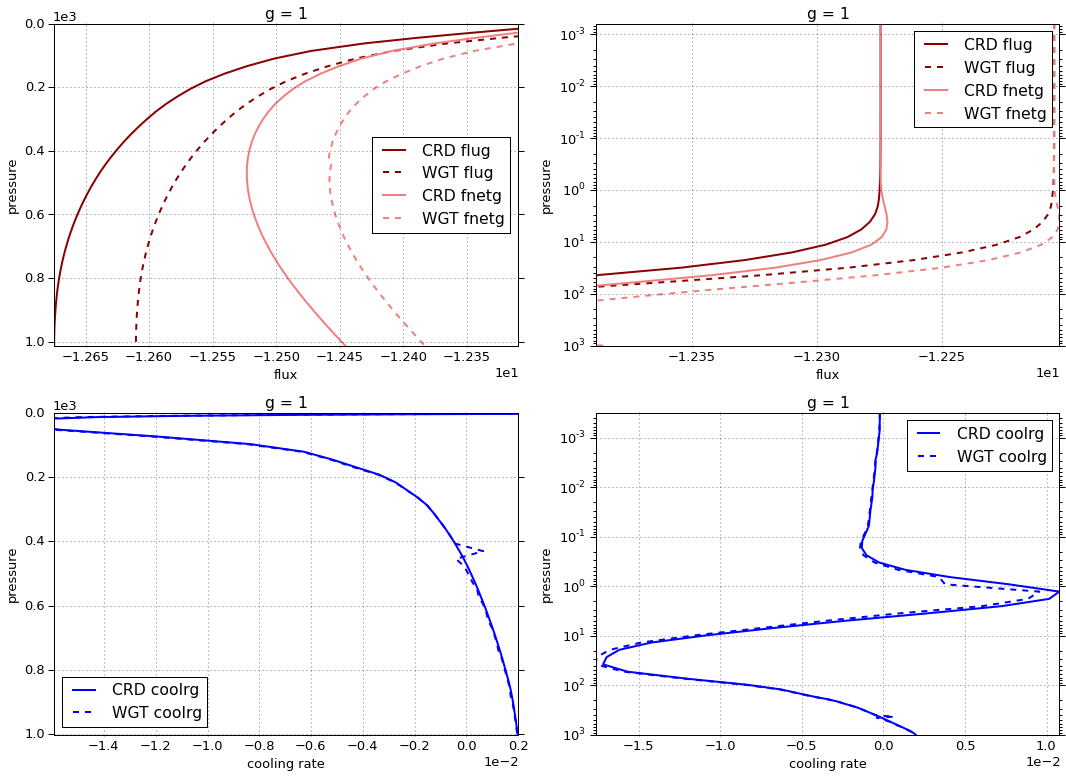

# Figure: flux, cooling rate. g-group 2

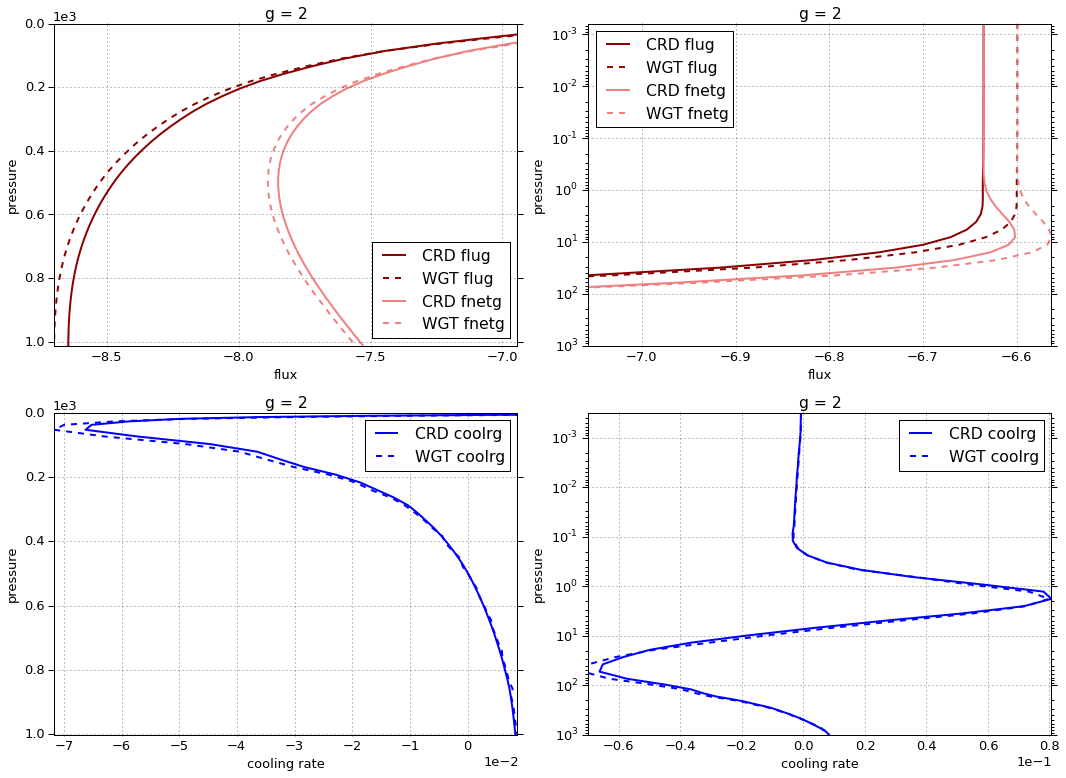

# Figure: flux, cooling rate. g-group 3

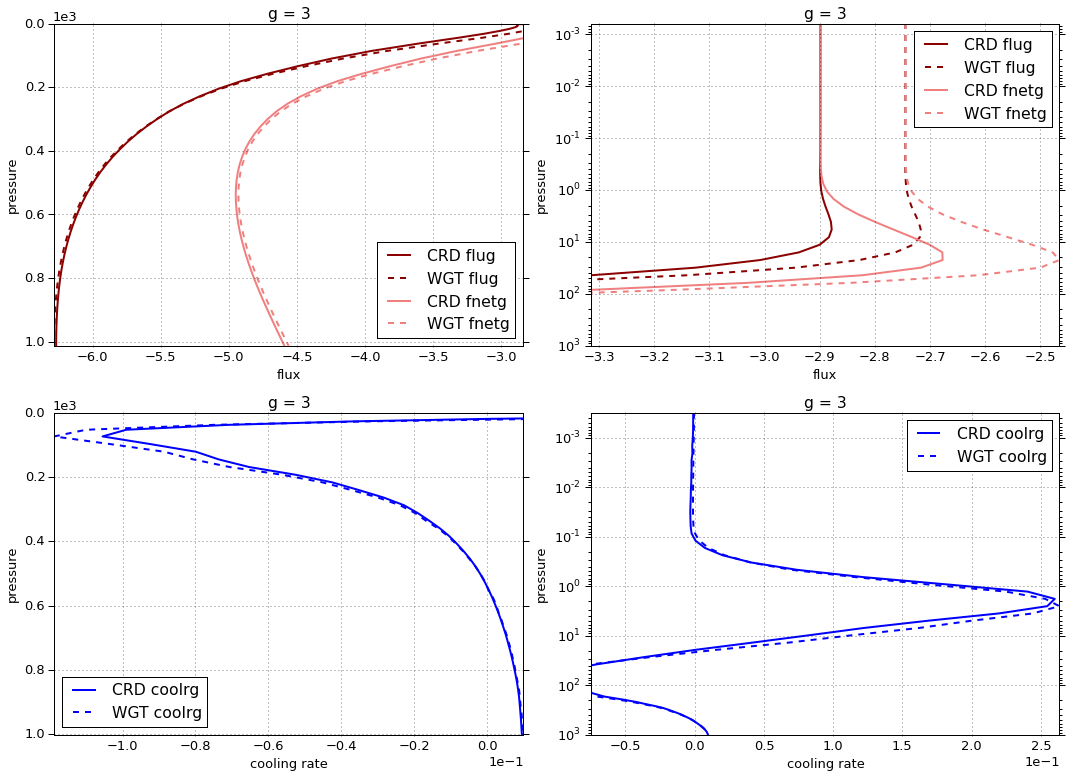

# Figure: flux, cooling rate. g-group 4

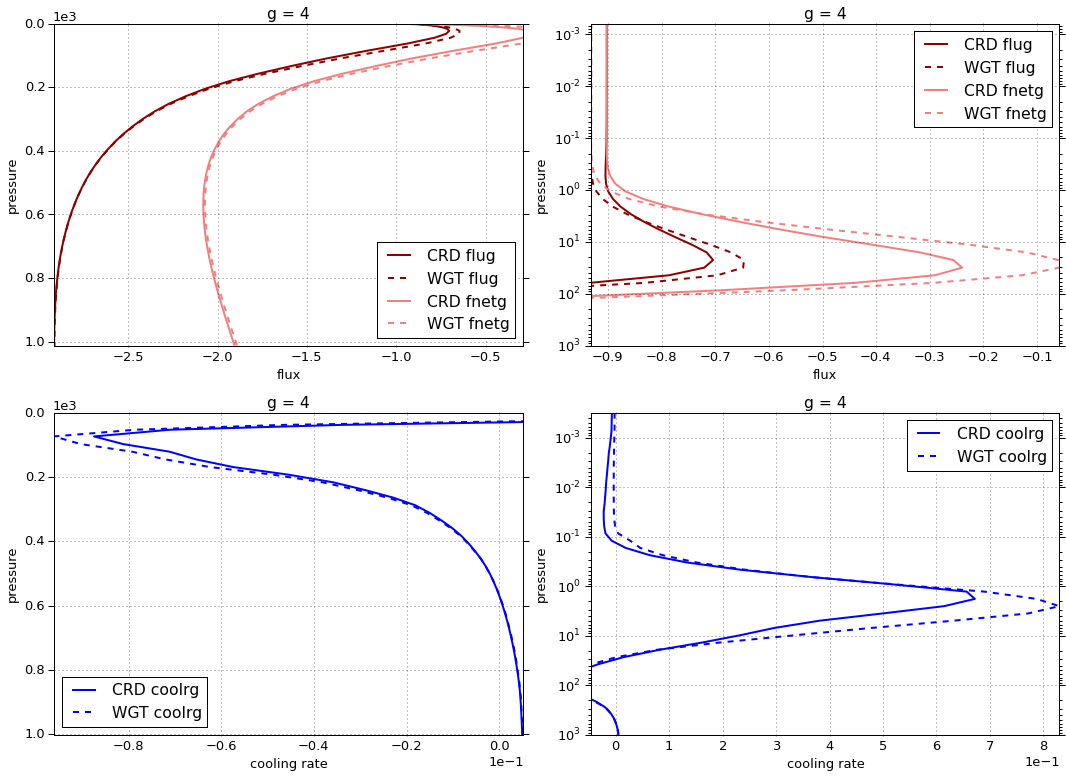

# Figure: flux, cooling rate. g-group 5

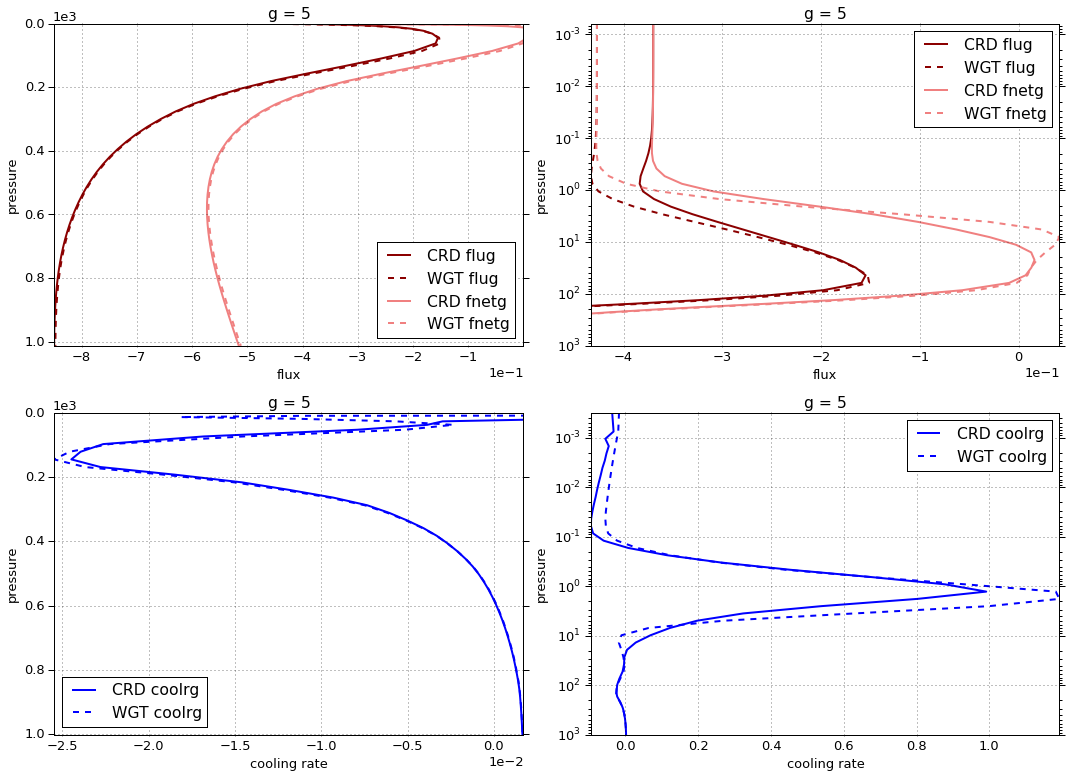

# Figure: flux, cooling rate. g-group total

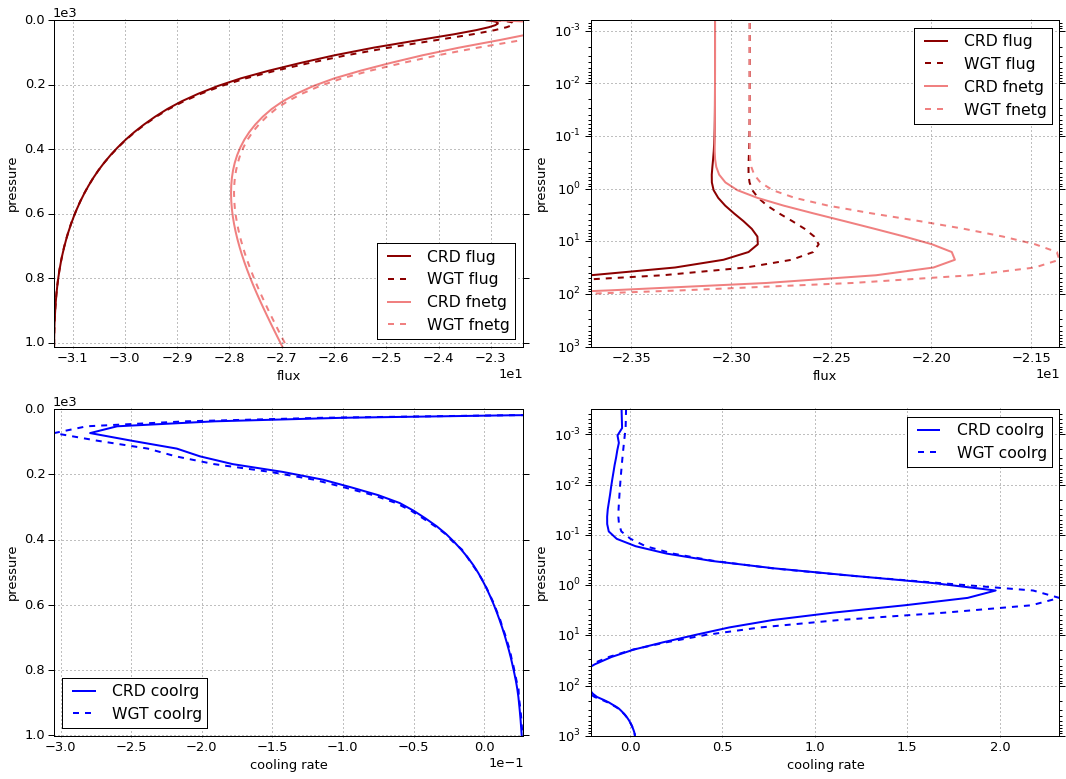

In [39]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [40]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -12.274527  0.000000 -12.274527
  1013     76    -12.674908  0.229195 -12.445712
2 0        1      -6.635504  0.000000  -6.635504
  1013     76     -8.646580  1.118645  -7.527935
3 0        1      -2.898934  0.000000  -2.898934
  1013     76     -6.269207  1.676264  -4.592942
4 0        1      -0.902136  0.000000  -0.902136
  1013     76     -2.913815  1.009412  -1.904403
5 0        1      -0.370206  0.000000  -0.370206
  1013     76     -0.849725  0.334272  -0.515454


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -12.205060  0.000000 -12.205060
  1013     76    -12.610552  0.227502 -12.383049
2 0        1      -6.599419  0.000000  -6.599419
  1013     76     -8.700310  1.144631  -7.555679
3 0        1      -2.744852  0.000000  -2.744852
  1013     76     -6.283752  1.721318  -4.562433
4 0        1      -0.931336  0.000000  -0.931336
  1013     76     -2.912185  1.021841  -1.890344
5 0        1      -0.427216  0.000000  -0.427216
  1013     76     -0.847437  0.335675  -0.511762


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.069467  0.000000  0.069467
  1013     76     0.064356 -0.001693  0.062663
2 0        1      0.036085  0.000000  0.036085
  1013     76    -0.053730  0.025986 -0.027744
3 0        1      0.154082  0.000000  0.154082
  1013     76    -0.014545  0.045054  0.030509
4 0        1     -0.029200  0.000000 -0.029200
  1013     76     0.001630  0.012429  0.014059
5 0        1     -0.057009  0.000000 -0.057009
  1013     76     0.002289  0.001404  0.003692

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000213
  1001.112500 75     0.001983
2 0.000312    1     -0.000803
  1001.112500 75     0.008280
3 0.000312    1     -0.001036
  1001.112500 75     0.009587
4 0.000312    1     -0.007069
  1001.112500 75     0.004942
5 0.000312    1     -0.036489
  1001.112500 75     0.001656


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000223
  1001.112500 75     0.001966
2 0.000312    1     -0.000749
  1001.112500 75     0.008635
3 0.000312    1     -0.000519
  1001.112500 75     0.009763
4 0.000312    1     -0.001996
  1001.112500 75     0.005002
5 0.000312    1     -0.017683
  1001.112500 75     0.001662


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000010
  1001.112500 75    -0.000017
2 0.000312    1      0.000053
  1001.112500 75     0.000355
3 0.000312    1      0.000517
  1001.112500 75     0.000176
4 0.000312    1      0.005073
  1001.112500 75     0.000060
5 0.000312    1      0.018807
  1001.112500 75     0.000007

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-23.081308,0.000000,-23.081308
1013,76,-31.354235,4.367789,-26.986446



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-22.907883,0.000000,-22.907883
1013,76,-31.354235,4.450968,-26.903267



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,1.734250e-01,0.000000,0.173425
1013,76,4.000000e-08,0.083179,0.083179


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.045611
1001.112500,75,0.026448



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.021171
1001.112500,75,0.027028



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.02444
1001.112500,75,0.00058


In [41]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.410750,0.402196
2,0.271208,0.277484
3,0.198167,0.200412
4,0.092708,0.092880
5,0.027167,0.027028


In [42]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                           wgt        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -12.274527  0.000000e+00 -12.274527   1     1   
0.000624      1     2 -12.274527  3.367796e-09 -12.274527   1     2   
0.000876      1     3 -12.274527  4.909586e-09 -12.274527   1     3   
0.001229      1     4 -12.274527  7.591089e-09 -12.274527   1     4   
0.001723      1     5 -12.274527  1.213470e-08 -12.274527   1     5   
0.002417      1     6 -12.274527  1.966105e-08 -12.274527   1     6   
0.003391      1     7 -12.274527  3.192088e-08 -12.274527   1     7   
0.004757      1     8 -12.274527  5.162484e-08 -12.274527   1     8   
0.006672      1     9 -12.274528  8.295111e-08 -12.274528   1     9   
0.009359      1    10 -12.274528  1.323180e-07 -12.274528   1    10   
0.013128      1    11 -12.274528  2.095427e-07 -12.274528   1    11   
0.018415      1    12 -12.274529  3.296169e-07 -12.274528   1    12   
0.025830      1    13 -12.274530  5.153210e-07 -12.274529   1    13   
0.036232      1    14 -12.274531  8.013245e-07 -12.274530   1    14   
0.050823      1    15 -12.274533  1.243887e-06 -12.274532   1    15   
0.071291      1    16 -12.274536  1.985078e-06 -12.274534   1    16   
0.100000      1    17 -12.274541  3.549031e-06 -12.274537   1    17   
0.140271      1    18 -12.274551  7.300089e-06 -12.274544   1    18   
0.196760      1    19 -12.274569  1.607600e-05 -12.274553   1    19   
0.275997      1    20 -12.274598  3.601538e-05 -12.274562   1    20   
0.387100      1    21 -12.274646  8.032617e-05 -12.274566   1    21   
0.543100      1    22 -12.274718  1.771443e-04 -12.274541   1    22   
0.761700      1    23 -12.274819  3.833877e-04 -12.274436   1    23   
1.068500      1    24 -12.274960  8.045655e-04 -12.274156   1    24   
1.498800      1    25 -12.275190  1.583847e-03 -12.273606   1    25   
2.102400      1    26 -12.275690  2.809960e-03 -12.272880   1    26   
2.949000      1    27 -12.276769  4.615724e-03 -12.272154   1    27   
4.136600      1    28 -12.278823  7.041668e-03 -12.271782   1    28   
5.802500      1    29 -12.282283  1.004879e-02 -12.272234   1    29   
8.139200      1    30 -12.287833  1.373570e-02 -12.274098   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -12.608299  9.427058e-02 -12.514028   1    47   
347.300000    1    48 -12.614383  9.741363e-02 -12.516969   1    48   
371.075000    1    49 -12.619985  1.006972e-01 -12.519288   1    49   
394.850000    1    50 -12.625168  1.041251e-01 -12.521043   1    50   
418.625000    1    51 -12.630007  1.077285e-01 -12.522278   1    51   
442.400000    1    52 -12.634495  1.114698e-01 -12.523026   1    52   
466.175000    1    53 -12.638633  1.153207e-01 -12.523313   1    53   
489.950000    1    54 -12.642425  1.192463e-01 -12.523179   1    54   
513.725000    1    55 -12.645921  1.232654e-01 -12.522655   1    55   
537.500000    1    56 -12.649164  1.274068e-01 -12.521757   1    56   
561.275000    1    57 -12.652161  1.316584e-01 -12.520502   1    57   
585.050000    1    58 -12.654931  1.360160e-01 -12.518915   1    58   
608.825000    1    59 -12.657488  1.404950e-01 -12.516993   1    59   
632.600000    1    60 -12.659834  1.450759e-01 -12.514758   1    60   
656.375000    1    61 -12.661979  1.497579e-01 -12.512221   1    61   
680.150000    1    62 -12.663931  1.545445e-01 -12.509386   1    62   
703.925000    1    63 -12.665690  1.594209e-01 -12.506269   1    63   
727.700000    1    64 -12.667265  1.643830e-01 -12.502882   1    64   
751.475000    1    65 -12.668663  1.694279e-01 -12.499235   1    65   
775.250000    1    66 -12.669889  1.745545e-01 -12.495335   1    66   
799.025000    1    67 -12.670948  1.797461e-01 -12.491202   1    67   
822.800000    1    68 -12.671854  1.850161e-01 -12.486838   1    68   
846.575000    1    69 -12.672620  1.

In [43]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -6.635504  0.000000e+00 -6.635504   2     1 -6.599419   
0.000624      2     2 -6.635504  1.908943e-08 -6.635504   2     2 -6.599419   
0.000876      2     3 -6.635504  2.782995e-08 -6.635504   2     3 -6.599419   
0.001229      2     4 -6.635504  4.303485e-08 -6.635504   2     4 -6.599419   
0.001723      2     5 -6.635504  6.880457e-08 -6.635504   2     5 -6.599419   
0.002417      2     6 -6.635505  1.115007e-07 -6.635504   2     6 -6.599419   
0.003391      2     7 -6.635505  1.810629e-07 -6.635505   2     7 -6.599419   
0.004757      2     8 -6.635505  2.928825e-07 -6.635505   2     8 -6.599420   
0.006672      2     9 -6.635506  4.706856e-07 -6.635505   2     9 -6.599420   
0.009359      2    10 -6.635507  7.509209e-07 -6.635506   2    10 -6.599421   
0.013128      2    11 -6.635508  1.189341e-06 -6.635507   2    11 -6.599423   
0.018415      2    12 -6.635511  1.871084e-06 -6.635509   2    12 -6.599425   
0.025830      2    13 -6.635514  2.925524e-06 -6.635511   2    13 -6.599428   
0.036232      2    14 -6.635519  4.549549e-06 -6.635515   2    14 -6.599433   
0.050823      2    15 -6.635527  7.062816e-06 -6.635520   2    15 -6.599440   
0.071291      2    16 -6.635539  1.127183e-05 -6.635527   2    16 -6.599451   
0.100000      2    17 -6.635559  2.013757e-05 -6.635539   2    17 -6.599470   
0.140271      2    18 -6.635597  4.128175e-05 -6.635556   2    18 -6.599505   
0.196760      2    19 -6.635660  9.028036e-05 -6.635570   2    19 -6.599563   
0.275997      2    20 -6.635758  2.001172e-04 -6.635558   2    20 -6.599652   
0.387100      2    21 -6.635899  4.399987e-04 -6.635459   2    21 -6.599778   
0.543100      2    22 -6.636068  9.531345e-04 -6.635115   2    22 -6.599926   
0.761700      2    23 -6.636211  2.019233e-03 -6.634192   2    23 -6.599972   
1.068500      2    24 -6.636241  4.145325e-03 -6.632096   2    24 -6.600016   
1.498800      2    25 -6.636163  8.045464e-03 -6.628118   2    25 -6.599955   
2.102400      2    26 -6.636553  1.419988e-02 -6.622353   2    26 -6.600157   
2.949000      2    27 -6.638435  2.327398e-02 -6.615161   2    27 -6.601842   
4.136600      2    28 -6.643341  3.543368e-02 -6.607907   2    28 -6.606403   
5.802500      2    29 -6.653111  5.042134e-02 -6.602690   2    29 -6.615790   
8.139200      2    30 -6.670489  6.870732e-02 -6.601782   2    30 -6.632747   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -8.259515  4.809625e-01 -7.778553   2    47 -8.307840   
347.300000    2    48 -8.297377  4.984986e-01 -7.798879   2    48 -8.346785   
371.075000    2    49 -8.331877  5.166552e-01 -7.815222   2    49 -8.382217   
394.850000    2    50 -8.363460  5.354177e-01 -7.828043   2    50 -8.414498   
418.625000    2    51 -8.392635  5.548815e-01 -7.837754   2    51 -8.444277   
442.400000    2    52 -8.419431  5.748555e-01 -7.844576   2    52 -8.471638   
466.175000    2    53 -8.443896  5.951517e-01 -7.848744   2    53 -8.496473   
489.950000    2    54 -8.466107  6.155994e-01 -7.850507   2    54 -8.519057   
513.725000    2    55 -8.486400  6.362930e-01 -7.850107   2    55 -8.539622   
537.500000    2    56 -8.505069  6.573422e-01 -7.847726   2    56 -8.558542   
561.275000    2    57 -8.522178  6.786611e-01 -7.843517   2    57 -8.575795   
585.050000    2    58 -8.537867  7.003014e-01 -7.837566   2    58 -8.591587   
608.825000    2    59 -8.552240  7.222634e-01 -7.829977   2    59 -8.606060   
632.600000    2    60 -8.565331  7.444781e-01 -7.820853   2    60 -8.619255   
656.375000    2    61 -8.577211  7.669401e-01 -7.810271   2    61 -8.631174   
680.150000    2    62 -8.587942  7.896433e-01 -7.798299   2    62 -8.641918   
703.925000    2    63 -8.597551  8.125129e-01 -7.785039   2   

In [44]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -2.898934  0.000000e+00 -2.898934   3     1 -2.744852   
0.000624      3     2 -2.898934  4.923515e-08 -2.898934   3     2 -2.744852   
0.000876      3     3 -2.898934  7.178690e-08 -2.898934   3     3 -2.744852   
0.001229      3     4 -2.898934  1.110519e-07 -2.898934   3     4 -2.744852   
0.001723      3     5 -2.898935  1.776556e-07 -2.898934   3     5 -2.744852   
0.002417      3     6 -2.898935  2.880967e-07 -2.898935   3     6 -2.744852   
0.003391      3     7 -2.898935  4.681734e-07 -2.898935   3     7 -2.744853   
0.004757      3     8 -2.898936  7.578631e-07 -2.898935   3     8 -2.744853   
0.006672      3     9 -2.898937  1.218835e-06 -2.898936   3     9 -2.744854   
0.009359      3    10 -2.898938  1.945892e-06 -2.898937   3    10 -2.744854   
0.013128      3    11 -2.898941  3.084143e-06 -2.898938   3    11 -2.744856   
0.018415      3    12 -2.898944  4.855330e-06 -2.898940   3    12 -2.744858   
0.025830      3    13 -2.898950  7.596621e-06 -2.898942   3    13 -2.744861   
0.036232      3    14 -2.898958  1.182148e-05 -2.898946   3    14 -2.744866   
0.050823      3    15 -2.898970  1.836359e-05 -2.898951   3    15 -2.744873   
0.071291      3    16 -2.898988  2.933556e-05 -2.898958   3    16 -2.744884   
0.100000      3    17 -2.899018  5.250578e-05 -2.898966   3    17 -2.744902   
0.140271      3    18 -2.899071  1.077642e-04 -2.898963   3    18 -2.744929   
0.196760      3    19 -2.899149  2.352540e-04 -2.898914   3    19 -2.744964   
0.275997      3    20 -2.899244  5.185458e-04 -2.898726   3    20 -2.744990   
0.387100      3    21 -2.899317  1.129091e-03 -2.898188   3    21 -2.744954   
0.543100      3    22 -2.899237  2.411500e-03 -2.896826   3    22 -2.744719   
0.761700      3    23 -2.898700  5.013901e-03 -2.893686   3    23 -2.743894   
1.068500      3    24 -2.897165  1.007018e-02 -2.887095   3    24 -2.742103   
1.498800      3    25 -2.894011  1.916643e-02 -2.874844   3    25 -2.738640   
2.102400      3    26 -2.889521  3.326339e-02 -2.856257   3    26 -2.733569   
2.949000      3    27 -2.884273  5.354466e-02 -2.830728   3    27 -2.727197   
4.136600      3    28 -2.879781  7.994473e-02 -2.799836   3    28 -2.720872   
5.802500      3    29 -2.878405  1.118294e-01 -2.766576   3    29 -2.716983   
8.139200      3    30 -2.883344  1.505597e-01 -2.732784   3    30 -2.718579   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -5.606985  8.374123e-01 -4.769572   3    47 -5.612675   
347.300000    3    48 -5.678877  8.645298e-01 -4.814347   3    48 -5.686617   
371.075000    3    49 -5.743184  8.923195e-01 -4.850865   3    49 -5.752665   
394.850000    3    50 -5.801013  9.207911e-01 -4.880222   3    50 -5.811760   
418.625000    3    51 -5.853532  9.498903e-01 -4.903641   3    51 -5.865326   
442.400000    3    52 -5.900994  9.793366e-01 -4.921657   3    52 -5.913517   
466.175000    3    53 -5.943668  1.008887e+00 -4.934781   3    53 -5.956867   
489.950000    3    54 -5.981850  1.038250e+00 -4.943600   3    54 -5.995591   
513.725000    3    55 -6.016253  1.067559e+00 -4.948694   3    55 -6.030334   
537.500000    3    56 -6.047482  1.096979e+00 -4.950504   3    56 -6.061832   
561.275000    3    57 -6.075745  1.126448e+00 -4.949297   3    57 -6.090378   
585.050000    3    58 -6.101355  1.155959e+00 -4.945396   3    58 -6.116105   
608.825000    3    59 -6.124550  1.185544e+00 -4.939006   3    59 -6.139384   
632.600000    3    60 -6.145448  1.215148e+00 -4.930300   3    60 -6.160352   
656.375000    3    61 -6.164218  1.244740e+00 -4.919479   3    61 -6.179163   
680.150000    3    62 -6.181006  1.274331e+00 -4.906675   3    62 -6.195980   
703.925000    3    63 -6.195899  1.303911e+00 -4.891988   3   

In [45]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.902136  0.000000e+00 -0.902136   4     1 -0.931336   
0.000624      4     2 -0.902137  2.796330e-07 -0.902137   4     2 -0.931337   
0.000876      4     3 -0.902137  4.074306e-07 -0.902137   4     3 -0.931337   
0.001229      4     4 -0.902138  6.288862e-07 -0.902137   4     4 -0.931337   
0.001723      4     5 -0.902139  1.002656e-06 -0.902138   4     5 -0.931338   
0.002417      4     6 -0.902141  1.619327e-06 -0.902139   4     6 -0.931338   
0.003391      4     7 -0.902143  2.619757e-06 -0.902141   4     7 -0.931339   
0.004757      4     8 -0.902147  4.220981e-06 -0.902143   4     8 -0.931341   
0.006672      4     9 -0.902154  6.755869e-06 -0.902147   4     9 -0.931344   
0.009359      4    10 -0.902163  1.073310e-05 -0.902152   4    10 -0.931347   
0.013128      4    11 -0.902178  1.692639e-05 -0.902161   4    11 -0.931353   
0.018415      4    12 -0.902200  2.651018e-05 -0.902173   4    12 -0.931362   
0.025830      4    13 -0.902233  4.125686e-05 -0.902191   4    13 -0.931376   
0.036232      4    14 -0.902283  6.384282e-05 -0.902219   4    14 -0.931396   
0.050823      4    15 -0.902356  9.856944e-05 -0.902258   4    15 -0.931425   
0.071291      4    16 -0.902466  1.557796e-04 -0.902310   4    16 -0.931468   
0.100000      4    17 -0.902646  2.713631e-04 -0.902375   4    17 -0.931534   
0.140271      4    18 -0.902941  5.303558e-04 -0.902411   4    18 -0.931589   
0.196760      4    19 -0.903375  1.089551e-03 -0.902285   4    19 -0.931685   
0.275997      4    20 -0.903933  2.248018e-03 -0.901685   4    20 -0.931706   
0.387100      4    21 -0.904491  4.564332e-03 -0.899927   4    21 -0.931453   
0.543100      4    22 -0.904656  9.053302e-03 -0.895602   4    22 -0.930449   
0.761700      4    23 -0.903514  1.739693e-02 -0.886117   4    23 -0.927754   
1.068500      4    24 -0.899514  3.219482e-02 -0.867319   4    24 -0.921587   
1.498800      4    25 -0.890520  5.665953e-02 -0.833861   4    25 -0.909641   
2.102400      4    26 -0.876463  9.064356e-02 -0.785819   4    26 -0.890912   
2.949000      4    27 -0.856861  1.326418e-01 -0.724220   4    27 -0.863968   
4.136600      4    28 -0.832421  1.784736e-01 -0.653948   4    28 -0.830045   
5.802500      4    29 -0.804690  2.259719e-01 -0.578719   4    29 -0.791692   
8.139200      4    30 -0.774572  2.778673e-01 -0.496705   4    30 -0.750784   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -2.476485  5.467852e-01 -1.929700   4    47 -2.471784   
347.300000    4    48 -2.528069  5.633485e-01 -1.964721   4    48 -2.524558   
371.075000    4    49 -2.573402  5.801656e-01 -1.993236   4    49 -2.570752   
394.850000    4    50 -2.613503  5.971842e-01 -2.016319   4    50 -2.611465   
418.625000    4    51 -2.649378  6.144263e-01 -2.034952   4    51 -2.647853   
442.400000    4    52 -2.681356  6.317040e-01 -2.049652   4    52 -2.680135   
466.175000    4    53 -2.709743  6.488542e-01 -2.060888   4    53 -2.708736   
489.950000    4    54 -2.734843  6.657447e-01 -2.069098   4    54 -2.733992   
513.725000    4    55 -2.757213  6.824618e-01 -2.074751   4    55 -2.756462   
537.500000    4    56 -2.777314  6.990995e-01 -2.078214   4    56 -2.776594   
561.275000    4    57 -2.795335  7.156226e-01 -2.079713   4    57 -2.794626   
585.050000    4    58 -2.811523  7.320593e-01 -2.079464   4    58 -2.810775   
608.825000    4    59 -2.826067  7.484443e-01 -2.077623   4    59 -2.825280   
632.600000    4    60 -2.839072  7.647304e-01 -2.074341   4    60 -2.838203   
656.375000    4    61 -2.850670  7.809293e-01 -2.069741   4    61 -2.849757   
680.150000    4    62 -2.860975  7.970510e-01 -2.063924   4    62 -2.859983   
703.925000    4    63 -2.870061  8.130442e-01 -2.057017   4   

In [46]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      5     1 -0.370206  0.000000 -0.370206   5     1 -0.427216   
0.000624      5     2 -0.370210  0.000001 -0.370209   5     2 -0.427218   
0.000876      5     3 -0.370211  0.000002 -0.370210   5     3 -0.427219   
0.001229      5     4 -0.370215  0.000002 -0.370212   5     4 -0.427220   
0.001723      5     5 -0.370219  0.000004 -0.370215   5     5 -0.427223   
0.002417      5     6 -0.370226  0.000006 -0.370219   5     6 -0.427227   
0.003391      5     7 -0.370236  0.000010 -0.370226   5     7 -0.427233   
0.004757      5     8 -0.370252  0.000016 -0.370236   5     8 -0.427243   
0.006672      5     9 -0.370278  0.000026 -0.370251   5     9 -0.427258   
0.009359      5    10 -0.370316  0.000041 -0.370275   5    10 -0.427281   
0.013128      5    11 -0.370375  0.000065 -0.370309   5    11 -0.427317   
0.018415      5    12 -0.370462  0.000102 -0.370361   5    12 -0.427370   
0.025830      5    13 -0.370594  0.000157 -0.370437   5    13 -0.427450   
0.036232      5    14 -0.370791  0.000242 -0.370549   5    14 -0.427569   
0.050823      5    15 -0.371083  0.000371 -0.370712   5    15 -0.427746   
0.071291      5    16 -0.371522  0.000580 -0.370942   5    16 -0.428009   
0.100000      5    17 -0.372231  0.000987 -0.371244   5    17 -0.428434   
0.140271      5    18 -0.373383  0.001853 -0.371531   5    18 -0.429114   
0.196760      5    19 -0.375093  0.003613 -0.371480   5    19 -0.430098   
0.275997      5    20 -0.377426  0.007017 -0.370409   5    20 -0.431357   
0.387100      5    21 -0.380259  0.013299 -0.366960   5    21 -0.432641   
0.543100      5    22 -0.382977  0.024387 -0.358590   5    22 -0.433306   
0.761700      5    23 -0.383937  0.042832 -0.341105   5    23 -0.431792   
1.068500      5    24 -0.380557  0.071370 -0.309187   5    24 -0.425644   
1.498800      5    25 -0.369456  0.110797 -0.258659   5    25 -0.411351   
2.102400      5    26 -0.352317  0.151040 -0.201277   5    26 -0.389609   
2.949000      5    27 -0.330183  0.182841 -0.147343   5    27 -0.360960   
4.136600      5    28 -0.305097  0.203261 -0.101837   5    28 -0.328307   
5.802500      5    29 -0.279139  0.216145 -0.062994   5    29 -0.295382   
8.139200      5    30 -0.253201  0.223958 -0.029243   5    30 -0.263902   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    5    47 -0.680251  0.168709 -0.511541   5    47 -0.677767   
347.300000    5    48 -0.700976  0.175341 -0.525635   5    48 -0.698731   
371.075000    5    49 -0.719059  0.181962 -0.537097   5    49 -0.716980   
394.850000    5    50 -0.734945  0.188556 -0.546389   5    50 -0.732965   
418.625000    5    51 -0.749063  0.195151 -0.553912   5    51 -0.747168   
442.400000    5    52 -0.761570  0.201683 -0.559886   5    52 -0.759723   
466.175000    5    53 -0.772608  0.208100 -0.564508   5    53 -0.770772   
489.950000    5    54 -0.782314  0.214358 -0.567957   5    54 -0.780490   
513.725000    5    55 -0.790920  0.220498 -0.570423   5    55 -0.789081   
537.500000    5    56 -0.798616  0.226565 -0.572051   5    56 -0.796765   
561.275000    5    57 -0.805483  0.232546 -0.572937   5    57 -0.803605   
585.050000    5    58 -0.811625  0.238459 -0.573166   5    58 -0.809716   
608.825000    5    59 -0.817122  0.244317 -0.572805   5    59 -0.815179   
632.600000    5    60 -0.822018  0.250108 -0.571910   5    60 -0.820050   
656.375000    5    61 -0.826369  0.255838 -0.570531   5    61 -0.824364   
680.150000    5    62 -0.830222  0.261511 -0.568711   5    62 -0.828180   
703.925000    5    63 -0.833608  0.267117 -0.566491   5    63 -0.831535   
727.700000    5    64 -0.836565  0.272659 -0.563906   5    64 -0.834456   
751.475000    5    65 -0.839128  0.278146 -0.560982   5    65 -0.836991   
775.250000    5    66 -0.841325  0.28

In [47]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')